# MLP for MNIST image classification

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [82]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

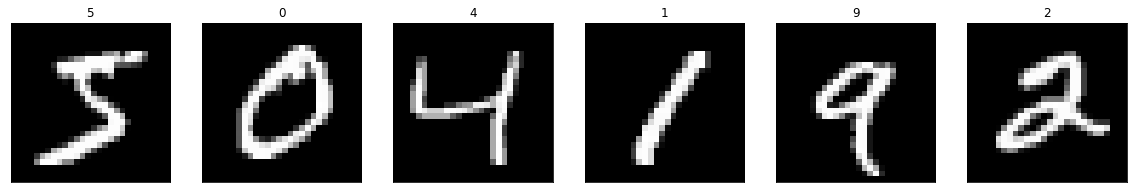

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

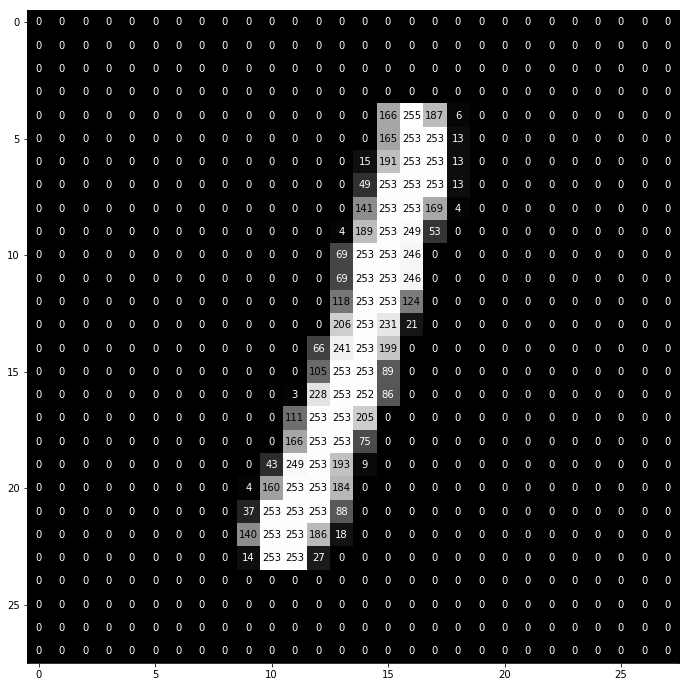

In [84]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[269], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [85]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

#Modif 5
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [86]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### 6. Define the Model Architecture

In [87]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

##### define the model. 

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))

# Version used in class
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Modif 1 : change number of nodes in hidden layers
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='softmax'))

# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='softmax'))

# Modif 2 : Increase/Decrease the number of hidden layers
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='softmax'))

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='softmax'))

# Modif 3 : Remove dropout layers
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(10, activation='softmax'))

# Modif 4 : Remove relu
# model.add(Dense(512))
# model.add(Dropout(0.2))
# model.add(Dense(256))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
________________________________________________________________

### 7. Compile the Model

In [88]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

#MOdif 6
# model.compile(loss='categorical_crossentropy', optimizer='sgd', 
#               metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [89]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

#for original model 10.1700% 
# modif 1 : 10.0600%
#modif 2 : 11.4700% / 12.8800%
# modif 3 : 8.5900%
# modif 4 :  14.7000%
# modif 5 : 10.5500%
# modif 6:  9.4200%

Test accuracy: 10.1400%


### 9. Train the Model

In [91]:
from keras.callbacks import ModelCheckpoint   

# train the model : Original model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s - loss: 0.1506 - acc: 0.9535 - val_loss: 0.1039 - val_acc: 0.9681
Epoch 2/10
48000/48000 [==============================] - 15s - loss: 0.0954 - acc: 0.9703 - val_loss: 0.0921 - val_acc: 0.9726
Epoch 3/10
48000/48000 [==============================] - 21s - loss: 0.0714 - acc: 0.9783 - val_loss: 0.1034 - val_acc: 0.9718
Epoch 4/10
48000/48000 [==============================] - 18s - loss: 0.0584 - acc: 0.9821 - val_loss: 0.0910 - val_acc: 0.9771
Epoch 5/10
48000/48000 [==============================] - 16s - loss: 0.0461 - acc: 0.9852 - val_loss: 0.0960 - val_acc: 0.9783
Epoch 6/10
48000/48000 [==============================] - 18s - loss: 0.0407 - acc: 0.9874 - val_loss: 0.0934 - val_acc: 0.9774
Epoch 7/10
48000/48000 [==============================] - 17s - loss: 0.0350 - acc: 0.9892 - val_loss: 0.0923 - val_acc: 0.9788
Epoch 8/10
48000/48000 [==============================

In [93]:
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
# hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
#           validation_split=0.2, callbacks=[checkpointer],
#           verbose=1, shuffle=True)

#Modif 7
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 24s - loss: 0.0202 - acc: 0.9948 - val_loss: 0.1349 - val_acc: 0.9807
Epoch 2/10
48000/48000 [==============================] - 28s - loss: 0.0230 - acc: 0.9941 - val_loss: 0.1555 - val_acc: 0.9804
Epoch 3/10
48000/48000 [==============================] - 31s - loss: 0.0217 - acc: 0.9942 - val_loss: 0.1375 - val_acc: 0.9818
Epoch 4/10
48000/48000 [==============================] - 38s - loss: 0.0249 - acc: 0.9940 - val_loss: 0.1490 - val_acc: 0.9813
Epoch 5/10
48000/48000 [==============================] - 57s - loss: 0.0255 - acc: 0.9940 - val_loss: 0.1509 - val_acc: 0.9811
Epoch 6/10
48000/48000 [==============================] - 32s - loss: 0.0241 - acc: 0.9944 - val_loss: 0.1765 - val_acc: 0.9784
Epoch 7/10
48000/48000 [==============================] - 46s - loss: 0.0218 - acc: 0.9946 - val_loss: 0.1696 - val_acc: 0.9802
Epoch 8/10
48000/48000 [==============================

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [94]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [96]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

# Original : ?? (run again)

# Modif 1 : Decresing the number of nodes in the second hidden layer from 512 to 256 yields 97.9600%
# Inverting the number of nodes in the two hidden laters yields : 97.9700% (this shows signs of ovrfitting since as 
# trainning loss decreases the val_loss starts to increase in the final epochs)

#Modif 2: 
#97.5200% . Added another hidden layer of 512 nodes. Shows signs of overfitting after epoch 4. val_loss starts increasing while trainning_loss decreses
# 98.0000% Only one layer of 512 nodes. The best one so far. val_loss stops decreasing(improving) after epoch 5 but does not increase 'too much'

#Modif 3:
#98.0300% Shows clear signs of overfitting after epoch 3. train_loss dcreases effctively to very small values but after ep3 val_loss goes back up

#Modif 4 :
#91.9300% . The accuracy decreased drastically

#Modif 5:
# 35.0300% . Very pooor accuracy. Parametrizing values is very important. Both train and val loss start at very high values

#Modif 6
# 93.4300% val_loss improvs at every epoch! It improves slowly tho, to improve general performace we would need to add more epochs



Test accuracy: 98.0800%
